<a href="https://colab.research.google.com/github/Yunyaonate/coclear_segmentation/blob/main/labelme_mask_batch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seedir
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 9.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import json
import cv2
import shutil


In [ ]:
import seedir as sd

sd.seedir('/content/drive/MyDrive/MDHDS/Capstone/Test_data',depthlimit =1)

Test_data/
├─masks/
├─images/
└─labelme_jsons/


In [ ]:
# import os
# import shutil

# Define your base directory where your files are located
base_dir = '/content/drive/MyDrive/MDHDS/Capstone/Test_data'  # Change this to the path where your files are currently located

# Define your target directories
jpeg_dir = '/content/drive/MyDrive/MDHDS/Capstone/Test_data/images'
json_dir = '/content/drive/MyDrive/MDHDS/Capstone/Test_data/labelme_jsons'

# Create target directories if they don't exist
if not os.path.exists(jpeg_dir):
    os.makedirs(jpeg_dir)

if not os.path.exists(json_dir):
    os.makedirs(json_dir)

# Move the JPEG files to 'images' and JSON files to 'labelme_jsons'
for filename in os.listdir(base_dir):
    if filename.lower().endswith('.jpeg'):
        shutil.move(os.path.join(base_dir, filename), os.path.join(jpeg_dir, filename))
    elif filename.lower().endswith('.json'):
        shutil.move(os.path.join(base_dir, filename), os.path.join(json_dir, filename))


# Cleaning up common unnecessary or hidden files and directories

In [ ]:
!find . -iname '._MACOSX'
!find . -iname '.DS_Store'
!find . -iname '.ipynb_checkpoints'

In [ ]:
!find . -iname '._MACOSX' -exec rm -rf {} +
!find . -iname '.DS_Store' -exec rm -rf {} +
!find . -iname '.ipynb_checkpoints' -exec rm -rf {} +

In [ ]:
import os
import json
import numpy as np
import cv2
import shutil

from tqdm import tqdm

In [ ]:
Dataset_Path = '/content/drive/MyDrive/MDHDS/Capstone/Test_data'

In [ ]:
class_info = [
    {'label': 'electrode', 'type': 'circle', 'color': 1, 'thickness': -1},  # Use thickness=-1 for filled circles
    {'label': 'cochlear', 'type': 'rectangle', 'color': 2, 'thickness': -1},  # Assuming rectangles are filled
    {'label': 'electrode', 'type': 'polygon', 'color': 1, 'thickness': -1}  # Assuming polygons are filled
]

In [ ]:
def labelme2mask_single_img(img_path, labelme_json_path):
    '''
    输入原始图像路径和labelme标注路径，输出 mask
    '''

    img_bgr = cv2.imread(img_path)
    img_mask = np.zeros(img_bgr.shape[:2], dtype=np.uint8) # 创建空白图像 0-背景

    with open(labelme_json_path, 'r', encoding='utf-8') as f:
        labelme = json.load(f)

        # Draw rectangles first
        for each in labelme['shapes']:
            if each['shape_type'] == 'rectangle':
                for one_class in class_info:
                    if each['label'] == one_class['label'] and one_class['type'] == 'rectangle':
                        points = np.array(each['points'], dtype=np.int32)
                        top_left = tuple(points[0])
                        bottom_right = tuple(points[1])
                        cv2.rectangle(img_mask, top_left, bottom_right, one_class['color'], one_class['thickness'])

        # Then draw polygons (if needed)
        for each in labelme['shapes']:
            if each['shape_type'] == 'polygon':
                for one_class in class_info:
                    if each['label'] == one_class['label'] and one_class['type'] == 'polygon':
                        points = np.array(each['points'], dtype=np.int32)
                        cv2.fillPoly(img_mask, [points], one_class['color'])

        # Finally, draw circles
        for each in labelme['shapes']:
            if each['shape_type'] == 'circle':
                for one_class in class_info:
                    if each['label'] == one_class['label'] and one_class['type'] == 'circle':
                        points = np.array(each['points'], dtype=np.int32)
                        center = tuple(points[0])
                        edge = tuple(points[1])
                        radius = int(np.linalg.norm(points[0] - points[1]))
                        cv2.circle(img_mask, center, radius, one_class['color'], one_class['thickness'])
    return img_mask


In [ ]:
Dataset_Path = '/content/drive/MyDrive/MDHDS/Capstone/Test_data/'
os.chdir(Dataset_Path)
# os.mkdir('masks')
os.chdir('images')

In [ ]:
for img_path in tqdm(os.listdir()):

    try:

        labelme_json_path = os.path.join('../', 'labelme_jsons', '.'.join(img_path.split('.')[:-1])+'.json')

        img_mask = labelme2mask_single_img(img_path, labelme_json_path)

        mask_path = img_path.split('.')[0] + '.png'

        cv2.imwrite(os.path.join('../','masks',mask_path), img_mask)

    except Exception as E:
        print(img_path, 'Convertion failed', E)

100%|██████████| 38/38 [00:03<00:00, 12.33it/s]


# After processing, delete the JSON files and original directories

In [ ]:
os.chdir('../')
shutil.move('images', 'img_dir')
shutil.move('masks', 'ann_dir')
!rm -rf labelme_jsons
os.chdir('../')

# Visualise the masks

(356, 736, 3)


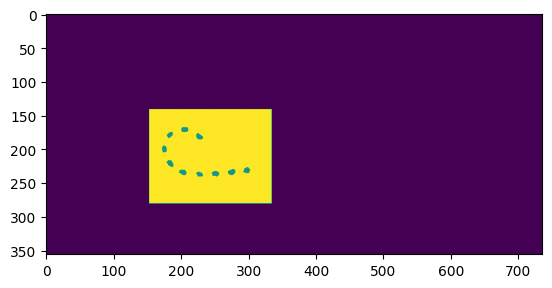

In [ ]:
from IPython.display import display, clear_output
import ipywidgets as widgets
import matplotlib.pyplot as plt

mask_path = '/content/drive/MyDrive/MDHDS/Capstone/Test_data/ann_dir/208_I0000626.png'
mask_img = cv2.imread(mask_path)
print(mask_img.shape)
np.unique(mask_img)

plt.imshow(mask_img[:,:,0])
plt.show()

In [ ]:
from ipywidgets import interact

# Directory where the PNG images are located
ann_dir = '/content/drive/MyDrive/MDHDS/Capstone/Test_data/ann_dir'

# Get a list of PNG files in the directory
png_files = [f for f in os.listdir(ann_dir) if f.endswith('.png')]

# Function to read and display an image
def display_image(file_idx):
    # Read image
    img_path = os.path.join(ann_dir, png_files[file_idx])
    img = cv2.imread(img_path)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert color from BGR to RGB
    # Display image shape and unique values in the image
    print(f"Image shape: {img.shape}")
    print(f"Unique values in the image: {np.unique(img[:,:,0])}")

    # Display the image
    plt.imshow(img[:,:,0])
    plt.axis('off') # Hide the axis
    plt.show()

# Create a slider to select different images
interact(display_image, file_idx=(0, len(png_files)-1))

interactive(children=(IntSlider(value=18, description='file_idx', max=37), Output()), _dom_classes=('widget-in…

<function __main__.display_image(file_idx)>

In [ ]:
import numpy as np
import cv2
from ipywidgets import interactive
import matplotlib.pyplot as plt


# Directory where the PNG images are located
ann_dir = '/content/drive/MyDrive/MDHDS/Capstone/Test_data/ann_dir'
img_dir = '/content/drive/MyDrive/MDHDS/Capstone/Test_data/img_dir/'

# Get a list of PNG files in the directory
png_files = [f for f in os.listdir(ann_dir) if f.endswith('.png')]
scan_files = [f for f in os.listdir(img_dir) if f.endswith('.jpeg')]

# Function to read and display an image
def display_image(file_idx):
    # Read image
    ann_path = os.path.join(ann_dir, png_files[file_idx])
    img_path = os.path.join(img_dir, scan_files[file_idx])

    img_scan = cv2.imread(img_path)
    img_mask = cv2.imread(ann_path, 0)  # Read as grayscale

    # Check if images are read properly
    if img_scan is None or img_mask is None:
        print("Error reading the images.")
        return

    # Check the unique values in img_mask
    print(f"Unique values in the mask: {np.unique(img_mask)}")

    # Assuming the mask has values 1 and 2, check the shape and data type
    print(f"Mask shape: {img_mask.shape}, Image shape: {img_scan.shape}, Mask data type: {img_mask.dtype}")

    # Create a color mask with the same dimensions as the original image
    color_mask = np.zeros_like(img_scan)
    color_mask[img_mask == 1] = [0, 0, 255]  # Red for 'electrode'
    color_mask[img_mask == 2] = [0, 255, 0]  # Green for 'cochlear'

    # Now, overlay the color mask on the original image
    alpha = 0.3

    # Blend the original image and the color mask
    overlayed_image = cv2.addWeighted(img_scan, 1-alpha, color_mask, alpha, 0)

    # Convert to RGB for display
    overlayed_image = cv2.cvtColor(overlayed_image, cv2.COLOR_BGR2RGB)

    # Display the result
    plt.imshow(overlayed_image)
    plt.axis('off')  # Hide the axis
    plt.show()

# Create a slider to select different images
interact(display_image, file_idx=(0, len(png_files)-1))


interactive(children=(IntSlider(value=18, description='file_idx', max=37), Output()), _dom_classes=('widget-in…

<function __main__.display_image(file_idx)>